In [10]:
# Uninstall incompatible versions
!pip uninstall -y numpy pandas scikit-learn matplotlib seaborn

# Install compatible versions
!pip install --no-cache-dir numpy==1.26.4 pandas==2.2.2 scikit-learn==1.4.2 matplotlib seaborn


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
ERROR: Exception:
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/shutil.py", line 825, in move
    os.rename(src, real_dst)
OSError: [Errno 18] Invalid cross-device link: '/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas-2.0.3.dist-info/' -> '/tmp/pip-uninstall-utfwvxj4'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pip/_internal/cli/base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninsta

In [13]:
# Run this in a separate cell first
!pip uninstall -y pandas
!pip install pandas

# Then restart the kernel befo

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


/home/91a440bf-d656-4258-841b-bd3145b22420/.local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/91a440bf-d656-4258-841b-bd3145b22420/.local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/91a440bf-d656-4258-841b-bd3145b22420/.local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


✅ Accuracy: 0.9474
🎯 F1 Score: 0.9474

📊 Classification Report:
               precision    recall  f1-score   support

        high       0.93      0.93      0.93        42
         low       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



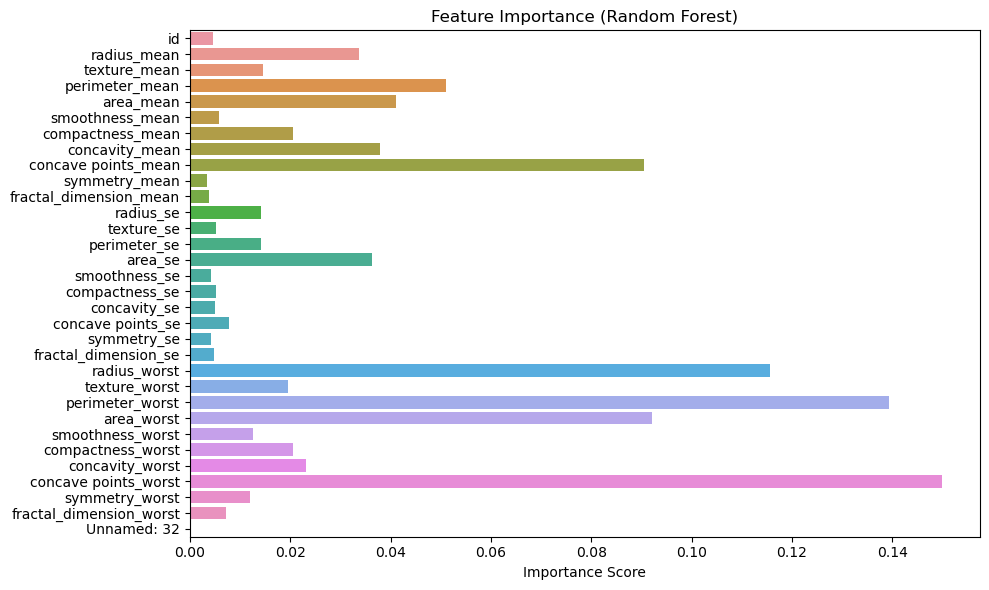

In [1]:
# ✅ Import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the local dataset (ensure this file exists in the same folder)
df = pd.read_csv("breast_cancer.csv")

# ✅ Check if the required column exists
if 'diagnosis' not in df.columns:
    print("❌ 'diagnosis' column not found. Columns available:", df.columns)
else:
    # ✅ Create a new target column based on diagnosis (M=high, B=low)
    df['priority'] = df['diagnosis'].map({'M': 'high', 'B': 'low'})

    # ✅ Use only numeric features (drop any non-numeric like 'id')
    X = df.select_dtypes(include='number')
    y = df['priority']

    # ✅ Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # ✅ Create the model pipeline (StandardScaler + RandomForest)
    model = make_pipeline(
        StandardScaler(),
        RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
    )
    model.fit(X_train, y_train)

    # ✅ Predict and evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("✅ Accuracy:", round(acc, 4))
    print("🎯 F1 Score:", round(f1, 4))
    print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

    # ✅ Visualize feature importance
    rf = model.named_steps['randomforestclassifier']
    importances = rf.feature_importances_
    features = X.columns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=features)
    plt.title("Feature Importance (Random Forest)")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()